In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

monthly_inflation_rates = pd.read_csv('data/US_inflation_rates.csv')

In [8]:
# the following code computes the weighted annual inflation rate and filters years

years = []
inflations = []
inflation_array = []
previous = 0.0
not_found = True
cur_year = ''
cycle = False
for x in monthly_inflation_rates.values:
  if not_found:
    date = x[0]
    if date.startswith('1959-12-01'):
      not_found = False
    else:
      continue
  else:
    date = x[0]
    if cur_year == '':
      if cycle:
        cur_infl = x[1]
        infl = (cur_infl-previous)/previous
        inflation_array.append(infl)
        # previous = cur_infl
        np_array = np.array(inflation_array)
        inflation_array = []
        sum = np_array.sum()
        inflations.append(sum)
      cur_year = date[:4]
      if cur_year.startswith('2020'):
        break
      previous = x[1]
      Y = int(cur_year)
      years.append(Y)
    else:
      cur_infl = x[1]
      infl = (cur_infl-previous)/previous
      infl*=100
      # rounded = round(infl, 3)
      inflation_array.append(infl)
      previous = cur_infl
      if date[5:7]=='12':
        cur_year = ''
        cycle = True


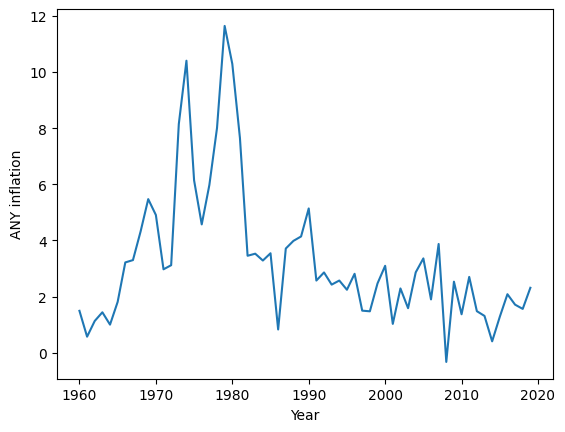

In [9]:
plt.plot(years, inflations)
plt.ylabel("ANY inflation")
plt.xlabel("Year")
plt.show()

In [10]:
crimes = pd.read_csv('data/Crime_rate_1960-2019.csv')


In [11]:
def convertToInt(arr):
  out = []
  for x in arr:
    # x = x[0:4]
    # print(x)
    converted = np.double(x)
    out.append(converted)
  return out

In [12]:
start = True
previous = 0
growth = []
year_growth = []

for x in crimes.values:
  y = x[0]
  p = x[3]
  p = p.replace(',','')
  year = np.int16(y)
  pop = np.double(p)
  if start:
    previous = pop
    start = False
    continue
  else:
    cur_growth = (pop - previous) / previous
    cur_growth *= 100
    growth.append(cur_growth)
    year_growth.append(year)
    previous = pop



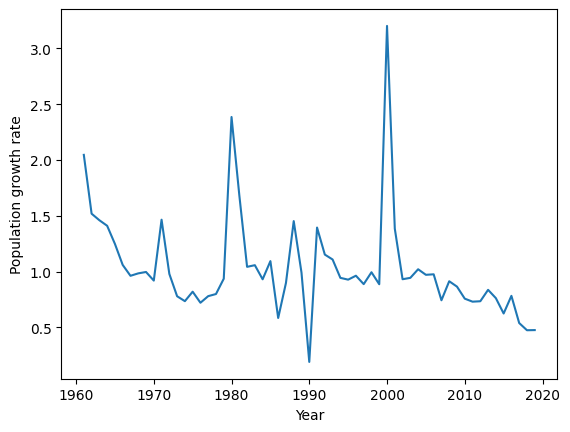

In [13]:
plt.plot(year_growth, growth)
plt.ylabel("Population growth rate")
plt.xlabel("Year")
plt.show()

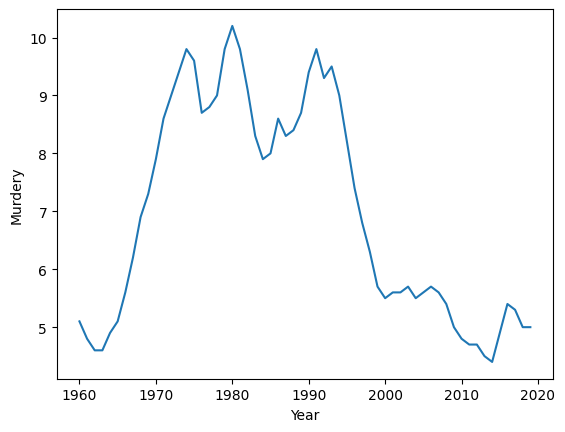

In [14]:
years_crime = crimes['Year\xa0']
murders = crimes['Murder\xa0']

mur = convertToInt(murders)
year_crime = convertToInt(years_crime)

plt.plot(year_crime, mur)
plt.ylabel("Murdery")
plt.xlabel("Year")
plt.show()

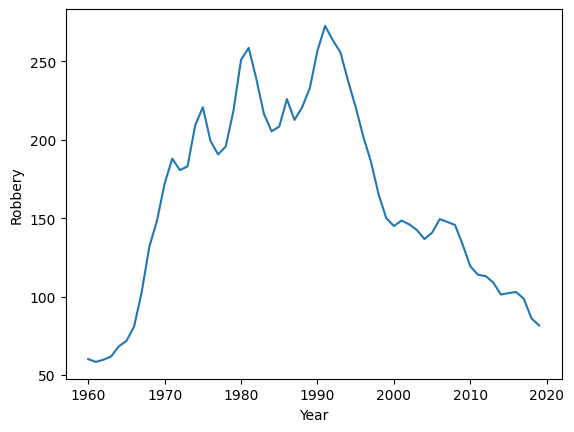

In [15]:
thefts = crimes['Robbery\xa0']
roberry = convertToInt(thefts)

plt.plot(year_crime, roberry)
plt.ylabel("Robbery")
plt.xlabel("Year")
plt.show()

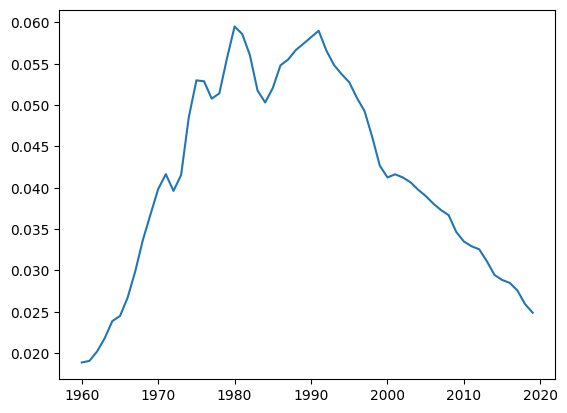

In [16]:
Y = crimes['Year\xa0']
years_ratio = convertToInt(Y)

population = []
total = []
for x in crimes.values:
  pop = x[3]
  tot = x[4]
  pop = pop.replace(",", "")
  tot = tot.replace(",", "")
  pop = np.double(pop)
  tot = np.double(tot)
  total.append(tot)
  population.append(pop)


for i in range(len(total)):
  popul = population[i]
  k = popul / 100000
  total_crimes = total[i] * k
  total[i] = total_crimes / popul
  # total[i] = total_crimes

# plt.plot(years_ratio, population)
plt.plot(years_ratio, total)
plt.show()
# print(population[0:5])
